##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [2]:
# Import libraries
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add channel dimension (28, 28, 1)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Number of unique classes
num_classes = len(set(y_train))


26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 363s 14us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 92s 21us/step


In [3]:
# Define class names
num_classes = len(set(y_train))


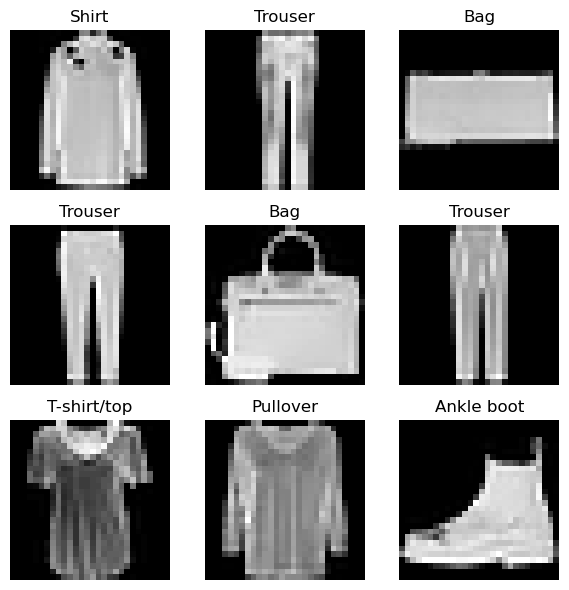

In [4]:
# Plot a 3x3 grid of random images from the dataset with their labels
import matplotlib.pyplot as plt
import numpy as np

# Class labels
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Pick 9 random images
indices = np.random.choice(len(x_train), 9, replace=False)

plt.figure(figsize=(6,6))
for i, idx in enumerate(indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[idx].squeeze(), cmap='gray')
    plt.title(class_names[y_train[idx]])
    plt.axis('off')

plt.tight_layout()
plt.show()


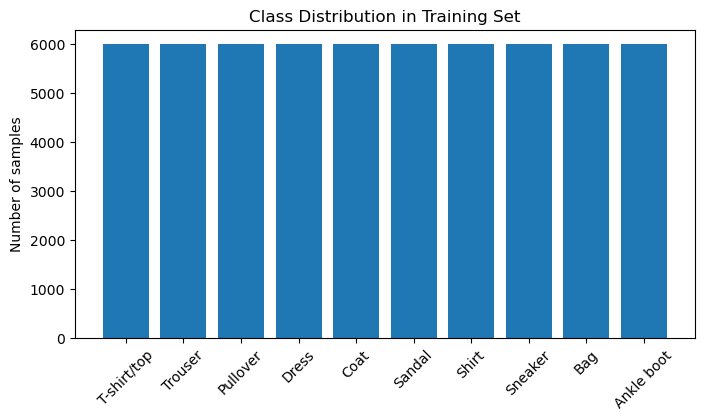

In [5]:
# Count occurrences of each class in the training set
# Plot the class distribution
import numpy as np
import matplotlib.pyplot as plt

# Count occurrences of each class
class_counts = np.bincount(y_train)

# Class labels
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Plot class distribution
plt.figure(figsize=(8,4))
plt.bar(class_names, class_counts)
plt.xticks(rotation=45)
plt.ylabel("Number of samples")
plt.title("Class Distribution in Training Set")
plt.show()



### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=15, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.7591 - loss: 0.6629 - val_accuracy: 0.8723 - val_loss: 0.3514
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8811 - loss: 0.3318 - val_accuracy: 0.8885 - val_loss: 0.2948
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8971 - loss: 0.2820 - val_accuracy: 0.8997 - val_loss: 0.2728
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9069 - loss: 0.2487 - val_accuracy: 0.9000 - val_loss: 0.2752
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9207 - loss: 0.2162 - val_accuracy: 0.9110 - val_loss: 0.2526
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9272 - loss: 0.1961 - val_accuracy: 0.9017 - val_loss: 0.2815
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9316 - loss: 0.1814 - val_accuracy: 0.9085 - val_loss: 0.2467
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9391 -